# 2 Transformer的核心组价

Transformer 架构的成功不仅仅在于其 **Self-Attention** 机制的创新，还在于一系列精心设计的核心组件，这些组件使得 Transformer 在处理**长序列**、**并行计算**以及**捕捉长距离依赖关系**时表现出色。在这一小节中，我们将深入探讨 **Encoder** 和 **Decoder** 结构、**Self-Attention 机制**、**Multi-Head Attention** 以及 **位置编码** 这些关键组件，并解释它们如何共同协作，形成一个强大的模型框架。

- **Encoder和Decoder结构**

Transformer 的设计基于经典的 **Encoder-Decoder** 架构，它将任务分为两部分：输入的编码和输出的解码。Encoder 的任务是接收输入序列并生成一个具有上下文信息的表示，而 Decoder 则使用该表示生成目标序列。两者之间通过多层堆叠的 **Self-Attention** 和 **前馈神经网络** 进行信息交互，确保信息流动和顺序关系的捕捉。

**Encoder** 部分逐层将输入序列转化为一个**更具表达力的高维表示**，而 **Decoder** 部分则根据这个表示生成最终的输出。我们将深入分析这两个模块的工作原理、互相之间如何交互，以及它们在不同任务（如机器翻译、文本生成）中的具体应用。

- **Self-Attention机制**

**Self-Attention** 机制是 Transformer 的核心创新之一，它允许每个输入单词在处理时与其他所有单词进行交互，从而捕捉全局依赖。相比于传统的 RNN 和 CNN，Self-Attention **不依赖于顺序处理**，可以并行计算，大大提高了效率。Self-Attention 的工作原理是**计算输入序列中每个元素与其他所有元素的相似性**，并根据这些相似度加权其**影响力**。我们将在本节中详细讨论 **注意力分数的计算方法**、**查询**（Query）、**键**（Key） 和 **值**（Value） 的作用及其计算过程。

- **Multi-Head Attention**

**Multi-Head Attention** 是 Transformer 中的另一个关键创新，它通过**多个独立的注意力头**来捕捉不同的上下文信息。每个头在不同的子空间中学习不同的特征，然后将它们的结果进行拼接，形成最终的输出。使用多个头的好处在于模型能够**从不同的角度捕捉输入的多重信息**，从而提升了表示能力和模型的效果。我们将详细分析为什么需要多头注意力，并探讨它如何提高模型的表现和泛化能力。

- **位置编码**

由于 Transformer 本身并不具有序列处理的内在顺序，因此需要通过 **位置编码** 来为模型提供词语在序列中的**位置信息**。位置编码是一种方法，用于将位置信息编码到输入的每个词的表示中，使得模型能够捕捉到词语之间的顺序关系。我们将探讨 **位置编码** 的设计原理及其实现方式，如何通过简单的数学函数生成位置编码，并分析其在 Transformer 架构中的作用。


## 2.1 Encoder和Decoder结构

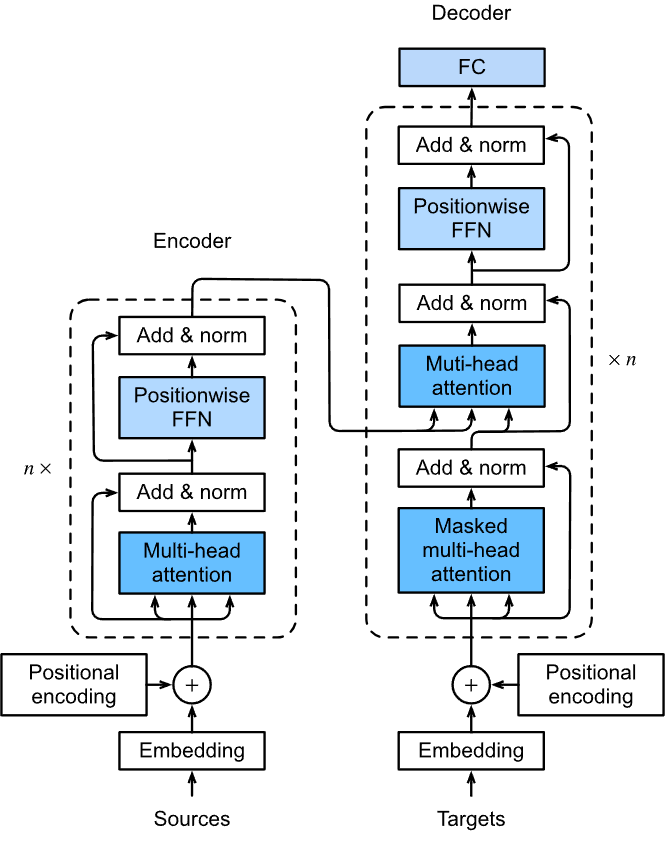

### 2.1.1 Encoder结构

Encoder 就是一个 **“编码器”** ，负责将人类能看懂的信息（如自然语言、图片、视频、语音）转化成人类看不懂的高维信息（信息包括**单元的意思**和**单元之间的关系**），具体落地为三个核心步骤：

- **“拆 + 认”：识别输入的最小信息单元**

    把人类可懂的信息（比如一句话、一张图的像素、一段声音的波形）拆成“最小单元”（自然语言拆成token/单词、图片拆成像素块、声音拆成音频帧），再给每个单元“贴标签”————比如把“苹果”这个词，转为模型能算的“基础高维向量”（相当于给“苹果”发一个“身份密码”，告诉模型“这是一种水果”）。

> 作用：解决“模型看不懂人类信息”的问题，把离散的信息变为可计算的“初始高位数据”。

- **“标顺序”：记录信息单元的位置关系**

    人类信息的“顺序”至关重要（比如“我吃苹果”和“苹果吃我”完全不同，图片左边的猫和右边的狗位置不能乱）。Encoder会给每个“最小单元”的“身份密码”里，额外加一个“位置标记”（比如“我”是第1位，“吃”是第2位），确保模型知道“谁在前，谁灾后”。

> 作用：避免模型“搞乱顺序”，让高维信息保留原始信息的“逻辑顺序”。

- **“找关系”：串联所有单元，让信息 “有逻辑”**

    这是Encoder最核心的一步 ———— 它会“反复检查” 所有信息单元：先找 “单元之间的关系”（比如“吃”和“我”是“动作 - 主语”关系，“吃”和“苹果”是 “动作 - 宾语”），再把这些关系整合起来，提炼出“重点信息”（比如这句话的核心是“吃苹果”这个动作）。而且会一层一层重复这个过程（比如先找直接关系，再找间接关系），让高维信息越来越“有逻辑、有重点”。

> 作用：把“零散的初始高位数据”，变成“有联系、有重点的深度高维信息”，让模型真正“理解”信息的含义，而不是“认识”单个单元。

---

**(1) `Encoder` 是如何完成 “拆 + 认”**

`Encoder` 首先要解决的问题就是：**人类输入的信息是“连续的大块”，模型没法直接处理，必须拆成“离散的小单元”**（就像我们吃蛋糕要切成小块，没法直接吞下整个）。不同类型的输入（文字/图片/声音），“拆”的方式和“最小单元”的名字不同，但逻辑一致。

|输入类型|	“拆” 的动作描述|	最小单元名称|	具体例子（以 “我吃苹果” 为例）|
|--|--|--|--|
|自然语言（文字）|	按 “语义不可再分” 的原则切割文本|	Token（词元）|	拆成：`[我]`、`[吃]`、`[苹果]`（中文常用单字 / 词作 Token）；英文 “Eat an apple” 拆成`[Eat]`、`[an]`、`[apple]`|
|图片|	按固定尺寸切割像素矩阵|	图像块（Patch）|	一张 `224x224` 的猫图，拆成 `16x16` 的小像素块（共 196 个 Patch）|
|声音（音频）|	按时间片段切割声波信号|	音频帧（Frame）|	一段 10 秒的讲话，按 20 毫秒 / 帧拆成 500 个音频帧|

这里要注意：“最小单元”不是越小越好，核心是“保留基本语义/特征”。比如中文“苹果”不能拆成`[草]`+`[平]`+`[果]`—— 拆到这个程度，语义就碎了，模型再也认不出 “苹果是水果”；而拆成`[苹果]`这个整体，语义才完整。

在底层，所有输入（文字/图片/声音）最终都会变成 **数字矩阵** ， 输出的也是数字矩阵。我们以最常见的“英文句子输入”为例，全程跟踪数据变化：

- 原始输入： 英文句子“`Eat an apple`”（人类可懂的文本）

- 最终输出（“拆”+“认”后）：一个$3 \times 512$ 的数字矩阵（3是“拆”出的单元数，512是“认”出的向量维度，模型可计算）

“拆”的核心是“**把字符串（文本）转为离散的、有唯一编号的Token ID**”，底层靠“**分词器（Tokenizer）**”执行。

**步骤1：加载“预定义词表”————机器的“字典”**

在“拆”之前，工程师会先给模型准备一个“**词表（Vocab）**”，本质是一个“字符串 → 数字ID”的映射表，比如：

|字符串（Token 文本）|	对应的唯一 ID（Token ID）|
|--|--|
|`<pad>`（补全符）|	0|
|`<unk>`（未知符）|	1|
|`Eat`|	345|
|`an`|	128|
|`apple`|	672|
|`I`|	42|
|...（所有常见单词 / 子词）|	...|

这个词表不是随便编的：

- 是用海量文本（比如维基百科、书籍）统计出来的 “高频字符串”（确保 99% 的输入文本能匹配到）；

- 长度固定（比如 10 万个词条），模型训练前就定死，不会变。

**步骤2：按“词表规则”切割文本**

拿到句子“`Eat an apple`”后，分词器会按照“词表规则”切割，规则分为3种（底层实现不同，但目标一致）：

1. **按“完整单词”切割（word-level Tokenization）**

    - 操作：直接把句子按空格/标点拆成完整单词，再去词表里查ID。
  
    - 例子：“`Eat an apple`” → 切割成 `["Eat", "an", "apple"]`
  
    - 查词表： "Eat" → 345，"an" → 128， "apple" → 672。得到Token ID列表 `[345, 128, 672]`
  
    - 底层问题：如果遇到词表里没有的词（比如"ApplePie"），会变成`<unk>`（ID=1），丢失语义。

2. **按“子词”切割（Subword Tokenization， 最常用，如 BPE、SentencePiece）**

    - 操作：先把单词拆成“高频子词”（词表里有），再查ID（解决“未知词”问题）。
  
    - 例子：若输入“`ApplePie`”（词表里没有），会拆成`["Apple", "Pie"]`（假设这两个子词在词表里，ID分别是346、890） → Token ID 列表 `[346, 890]`。
  
    - 底层逻辑：用“统计频率”的方式预训练子词（比如"Apple"和"Pie"在海量文本里出现次数多，就放进词表），确保少见的组合词能拆成常见子词。

3. **按“字符”切割（Character-level Tokenization）**

    - 操作：把句子拆成单个字母/字符， 再查ID（最极端，解决所有未知词）。
  
    - 例子："Eat" → 拆成`["E", "a", "t"]` → 查词表得到对应ID（比如"E"=5, "a"=2, "t"=19）
  
    - 底层问题：Token数量太多（一句话拆成几百个字符），模型计算量变大。

**步骤3：补全/截断，确保Token ID长度一致**

模型要求输入的"Token ID 列表"长度必须固定（比如固定为10）。如果实际长度不够，就用`<pad>`（ID=0）补全；如果太长（比如超过10个），就截断后面的Token。

- 例子：补全后得到`[345, 128, 672, 0, 0, 0, 0, 0, 0, 0]`

到这里，“拆”的底层操作全部完成：**原始文本** → **切割成Token字符串** → **转成 Token ID 列表** → **补全/截断成固定长度**， 最终得到一个“1维数字数组”（比如长度10）。

“认”的核心是“**把Token ID 这个数字标签，转成包含语义的高维向量**”，底层靠“嵌入层（Embedding Layer）”执行，本质是“查向量表 + 矩阵乘法”。

**步骤1：初始化“嵌入矩阵”————机器的“语义向量词典”**

在模型训练前，会初始化一个“**嵌入矩阵（Embedding Matrix）**”， 这个矩阵的形状是`[词表大小 * 嵌入维度]`（比如词表大小10万，嵌入维度512，矩阵就是 `100000*512`）。

- 每个行向量，对应词表里一个Token ID的“初始语义向量”（比如第345行，对应Token ID=345("Eat")， 向量是`[0.12, -0.34, 0.56, ..., 0.79](512个数字)`）

- 初始值：不是随便编的，而是用“随机数”（服从正态分布，均值0， 方差0.01）初始化，然后会通过训练不断调整（让“Eat”和“Consume”的向量更像，和“Apple”的向量更远）。

- 在迁移学习的场景下，嵌入矩阵直接加载**预训练好的嵌入向量**（如Word2Vec、GloVe），这样模型无需从0学习基础语义，能更快收敛到好结果。

**步骤2：用“索引查找+矩阵乘法”获取Embedding向量**

拿到“拆”好的Token ID 列表（比如`[345, 128, 672, 0, ..., 0]`）后，嵌入层会执行“索引查找”————本质是从“嵌入矩阵”里，把每个Token ID对应的“行向量”抽出来，拼在一起。

**底层操作细节（用矩阵乘法解释）：**

为了让操作可微分（方便模型训练），底层不会直接“抽行”，而是把Token ID 转成 “**独热编码（One-Hot Encoding）**”，再和“嵌入矩阵”做乘法。

以Token ID=345为例：

1. **转为独热编码**：把ID=345转成一个只有第345位是1，其他都是0的独热向量。比如`[0, 0, ..., 1, ..., 0]`（第345位是1）。

2. **乘嵌入矩阵**：独热向量($1\times100000$) $\times$ 嵌入矩阵($100000\times1$) = ($1\times512$)的向量，这就是Token ID=345对应的Embedding向量

**批量处理（对应整个句子）：**

如果Token ID 列表是 `[345, 128, 672]`（长度3），会先把每个ID转为独热向量，拼成一个 $3\times100000$的独热矩阵，再乘嵌入矩阵（$100000\times512$），最终得到一个$3\times512$的Embedding矩阵 ———— 这就是“认”的最终输出。

**"拆+认"流程总结**

我们用 “Eat an apple” 完整跟踪从 “文本” 到 “Embedding 矩阵” 的底层数据流转：

1. 原始输入：字符串 “`Eat an apple`”

2. 拆（步骤 1-3）：
    
    - 切割成 Token 字符串：`["Eat", "an", "apple"]`
    
    - 转 Token ID：`[345, 128, 672]`
    
    - 补全成固定长度（假设长度 3，无需补全）：`[345, 128, 672]`（1 维数组，长度 3）

3. 认（步骤 1-2）：
    
    - Token ID 转独热矩阵：3×100000（每行只有一个 1，对应一个 ID）
    
    - 乘嵌入矩阵（100000×512）：得到 3×512 的 Embedding 矩阵

4. 最终输出：3×512 的数字矩阵（每个行向量对应一个 Token 的语义，模型可直接用于后续计算）


---

**(2) Encoder 如何完成“标顺序”**

**位置编码（Position Encoding）** 是Encoder确保模型理解“信息单元顺序”的关键步骤，底层核心逻辑是 **“给每个Token的嵌入向量额外叠加一个位置信号”**，让模型能通过这个信号判断Token的先后关系。

**1. 为什么必须 “标顺序”？—— 自注意力的天然缺陷**

Transformer的核心组件“自注意力”有个致命问题：**它是“无序的”**。

比如处理句子“我吃苹果”和“苹果吃我”时：

- 两个句子的Token完全相同（只是顺序不同）

- 自注意力计算时，只看Token之间的关联（“我”与“吃”、“吃”与“苹果”），不区分谁在前谁在后

- 如果不标顺序，模型会认为这两个句子语义完全相同（显然错误）。

因此，Encoder必须主动会给每个Token“打上位置标签”，弥补自注意力的缺陷。

**2. 底层实现：给嵌入向量叠加“位置编码向量”**

“标顺序”的操作非常直接：**为每个位置（比如第1个Token、第2个Token...）生成一个“位置编码向量”，然后与该位置的Token嵌入向量相加**。

假设句子有 3 个 Token，嵌入维度是 512，整个过程的底层数据变化如下：

```plaintext
Token嵌入向量（3×512矩阵）：
[
  [x1, x2, ..., x512],  # 第1个Token（如“我”）的嵌入向量
  [y1, y2, ..., y512],  # 第2个Token（如“吃”）的嵌入向量
  [z1, z2, ..., z512]   # 第3个Token（如“苹果”）的嵌入向量
]
          ↓
加上位置编码向量（3×512矩阵）：
[
  [p1_1, p1_2, ..., p1_512],  # 第1个位置的编码向量
  [p2_1, p2_2, ..., p2_512],  # 第2个位置的编码向量
  [p3_1, p3_2, ..., p3_512]   # 第3个位置的编码向量
]
          ↓
结果（带位置信息的嵌入向量）：
[
  [x1+p1_1, x2+p1_2, ..., x512+p1_512],
  [y1+p2_1, y2+p2_2, ..., y512+p2_512],
  [z1+p3_1, z2+p3_2, ..., z512+p3_512]
]
```

> 关键细节：是 “相加” 而不是 “拼接”。这样既能保留 Token 的语义（嵌入向量），又能注入位置信息（位置编码向量），且不改变向量维度（依然是 512 维），保证后续计算流程统一。

**3. 位置编码向量怎么生成？ ———— 正弦余弦函数的巧妙设计**

Transformer 论文中最经典的位置编码生成方式，是用**正弦函数和余弦函数**，公式如下（对每个位置pos和每个维度i）：

当i为偶数时：

$$PE(pos, i) = sin(pos / 10000^{(2i/d_{model})})$$

当i为奇数时：

$$PE(pos, i) = cos(pos / 10000^{(2i/d_{model})})$$

其中：

- `pos`：Token在句子中的位置（从0开始，比如第1个Token的pos=0, 第2个pos=1）

- `i`：嵌入向量的维度索引（从0到511，比如512维向量的第0维、第1维……）

- $d_{model}$：嵌入维度（比如512）

**例子：**

假设$d_{model}=4$（简化为 4 维，方便计算），计算`pos=0`（第 1 个位置）和`pos=1`（第 2 个位置）的编码向量：

1. 对pos=0：

    - 维度 0（偶数）：$PE (0,0) = sin (0 / 10000^{(0/4)}) = sin (0) = 0$
    
    - 维度 1（奇数）：$PE (0,1) = cos (0 / 10000^{(0/4)}) = cos (0) = 1$

    - 维度 2（偶数）：$PE (0,2) = sin (0 / 10000^{(2/4)}) = sin (0) = 0$

    - 维度 3（奇数）：$PE (0,3) = cos (0 / 10000^{(2/4)}) = cos (0) = 1$

    - 位置 0 的编码向量：`[0, 1, 0, 1]`

2. 对pos=1:

    - 维度 0：$PE (1,0) = sin (1 / 10000^0) = sin (1) ≈ 0.841$

    - 维度 1：$PE (1,1) = cos (1 / 10000^0) = cos (1) ≈ 0.540$

    - 维度 2：$PE (1,2) = sin (1 / 10000^{(0.5)}) = sin (1/100) ≈ 0.010$

    - 维度 3：$PE (1,3) = cos (1 / 10000^{(0.5)}) = cos (1/100) ≈ 0.999$

    - 位置 1 的编码向量：`[0.841, 0.540, 0.010, 0.999]`

**为什么用正弦余弦？—— 3 个精妙设计**

1. 能表达 “相对位置”：

    数学上可以证明，对于任意位置pos和偏移量k，PE(pos+k)可以用PE(pos)的正弦和余弦函数表示（线性组合）。这意味着模型能通过两个位置编码向量的关系，推断出它们之间的距离（比如 “pos=2” 和 “pos=5” 相差 3 个位置）。

2. 范围固定，不随 pos 增大而爆炸：

    正弦和余弦函数的值域始终在`[-1, 1]`之间，无论pos多大（比如第 1000 个 Token），位置编码向量的数值都不会失控，保证后续计算稳定。

3. 泛化能力强：

    训练时可能只见过长度为 100 的句子，但这种编码方式可以无缝扩展到更长的句子（比如长度 1000）—— 只需按公式计算`pos=100`到`pos=999`的编码即可，无需重新训练。


---

**(3) Encoder 如何实现“找关系”**

Encoder的“找关系”是其最核心的能力，本质是通过“**自注意力机制（Self-Attention）**”让每个单元（Token）与其他所有单元建立关联，最终形成有逻辑的整体。这一步可以拆解为 “底层数学原理”“多头注意力的作用”“残差连接与归一化” 三个关键部分。

Token A和Token B的关系，可以通过“注意力权重”这个数值来表示（一个标量），而这个权重的计算完全依赖A的$Q$向量和B的$K$向量的相似度。

- $Q$(A的“问题”)和$K$(B的“标签”)越像，A对B的注意力权重就越高， 说明 A 和 B 关系越近

- 有了权重后，再用这个权重去“提取B的$V$向量（B的具体信息）”，最终融入A的输出中

整个过程就像：A拿着自己的“问题卡$Q$”，去对比B的“标签卡$K$”，越匹配就越关注B的“信息卡$V$”，最终形成A对B的“关系认知”。

**1. 核心目标：让每个Token“看到”其他所有Token**

假设处理句子`"I eat apples"`（拆分为3个Token： `[I, eat, apples]`），“找关系”要实现的效果是：

- `I` 要关注`eat`（“谁在吃”）

- `eat` 要重点关注 `I` 和 `apples` （“谁吃什么”）

- `apples` 要关注`eat`（“被什么动作作用”）

自注意力机制通过“计算注意力权重”实现这一点 ———— 权重越高，说明两个Token的关系越紧密。

**2. 自注意力的底层步骤：用矩阵运算找关系**

自注意力的计算可以总结为 “**生成 3 个向量 → 1个权重计算 → 1个加权求和**”，全程通过矩阵运算实现高效并行。

**步骤1：为每个Token生成3个核心向量（$Q$、$K$、$V$）**

首先，给每个Token的“带位置的嵌入向量”（经过“拆+认+标顺序”后的向量）生成3个新向量：

- **$Q$(Query, 查询向量)**：代表“当前Token想找什么关系”（比如`eat`的$Q$是“我想找谁在做我这个动作，以及我作用于谁”）

- **$K$(Key, 键向量)**：代表“当前Token能提供什么关系”（比如`I`的$K$是“我可以作为动作的发出者”）

- **$V$(Value, 值向量)**：代表“当前Token的具体信息”（比如`I`的$V$是“我是第一人称主语”）

**底层实现：**

通过3个可训练的权重矩阵（$W_Q$、$W_K$、$W_V$，形状都是`[d_{model}, d_k]`，其中$d_{model}=512$，$d_k=64$）对Token向量进行线性变换：

$$
Q_i = TokenVector_i \times W_Q
$$
$$
K_i = TokenVector_i \times W_K
$$
$$
V_i = TokenVector_i \times W_V
$$

以“`I eat apples`”为例（3个Token，每个向量512维）

- 输入矩阵 `X` 形状：`[3, 512]`（3个Token，每个512维）

- 生成的$Q$、$K$、$V$矩阵形状：`[3, 64]`（每个向量从512维压缩到64维，减少计算量）

**步骤2：计算注意力权重（谁和谁的关系近）**

注意力权重的本质是“$Q$与$K$的相似度” ———— $Q$和$K$越相似，说明两个Token的关系越紧密。

**step1：计算$Q$与$K$的点积：**

$$
相似度矩阵=Q \times K^T= \left[ \begin{array}{cc} 
Q_I \cdot K_I & Q_I \cdot K_{eat} & Q_I \cdot K_{apples} \\ 
Q_{eat} \cdot K_I & Q_{eat} \cdot K_{eat} & Q_{eat} \cdot K_{apples} \\
Q_{apples} \cdot K_I & Q_{apples} \cdot K_{eat} & Q_{apples} \cdot K_{apples}
\end{array} \right]
$$

假设结果为：

$$
\left[ \begin{array}{cc}
0.2 & 0.8 & 0.1 \\
0.9 & 0.3 & 0.7 \\
0.1 & 0.9 & 0.2
\end{array} \right]
$$

说明：

- `I` 最关注 `eat`(0.8)

-  `eat` 最关注 `I` (0.9)，其次是 `apples` (0.7)

- `apples` 最关注 `eat` (0.9)

**step2：缩放(Scaling)：**

用$\sqrt{d_k}$ （$sqrt{64} = 8$）除以点积结果，避免数值过大导致后序Softmax梯度消失。

$$
缩放后矩阵 = 相似度矩阵 / \sqrt{d_k}
$$

假设结果为：

$$
\left[ \begin{array}{cc}
0.025 & 0.1 & 0.0125 \\
0.1125 & 0.0375 & 0.0875 \\
0.0125 & 0.1125 & 0.025
\end{array} \right]
$$

**step3：Softmax归一化：**

将每行数值转换为“和为1的概率”，得到最终的**注意力权重矩阵**（权重越高，关系越紧密）：

$$
权重矩阵=Softmax(缩放后矩阵)
$$

假设结果为：

$$
\left[ \begin{array}{cc}
0.32 & 0.45 & 0.23 \\
0.48 & 0.21 & 0.31 \\
0.22 & 0.56 & 0.22
\end{array} \right]
$$

**步骤3：加权求和得到注意力输出（整合关系信息）**

用注意力权重矩阵与$V$矩阵相乘，让每个Token“按权重整合其他Token的信息”：

$$
注意力输出矩阵 = 权重矩阵 \times V
$$

$$
V=\left[
\begin{array}{cc}
v_{I_1} & v_{I_2} & \cdots &v_{I_{64}} \\
v_{eat_1} & v_{eat_2} & \cdots &v_{eat_{64}} \\
v_{apples_1} & v_{apples_2} & \cdots &v_{apples_{64}} \\
\end{array}
\right]
$$

- 第 1 行（`I` 的输出）= $0.32×V_I + 0.45×V_{eat} + 0.23×V_{apples}$（`I` 的信息中融入了 `eat` 的主要信息）

- 第 2 行（`eat` 的输出）= $0.48×V_I + 0.21×V_{eat} + 0.31×V_{apples}$（`eat` 的信息中融入了 `I` 和 `apples` 的信息）

- 第 3 行（`apples` 的输出）= $0.22×V_I + 0.56×V_{eat} + 0.22×V_{apples}$（`apples` 的信息中融入了 `eat` 的主要信息）

**3. 多头注意力（Multi-Head Attention）：从多个角度找关系**

单个自注意力只能从“一个角度”找关系（比如只关注主谓宾），而**多头注意力**会并行执行“8组自注意力”（论文中用8头），每组关注不同的关系（比如：头1看主谓关系，头2看动宾关系，头3看修饰关系），最后将结果拼接整合。

**为什么需要多头注意力？ ———— 单一注意力的局限性**

假设用“单头注意力”分析句子“`The cat sits on the mat`”，它可能只会关注到“核心主谓宾”(cat → sits)，但语言中的关系是多维度的：

- 谁是主语？ (`cat` 与 `sits` 的关系)

- 动作发生在哪里？（`sits` 与 `on the mat` 的关系）

- 两个 `the` 分别修饰谁？ （`the` 与 `cat` 、 `the` 与 `mat` 的关系）

单头注意力只能“模糊地平均所有关系”，而多头注意力就像“多个专家分工合作”：每个头专注于捕捉一种特定关系，最后汇总所有专家的结论，得到更全面的理解。

**多头注意力的核心步骤：“拆分” → “并行计算” → “拼接”**

多头注意力的操作可以拆解为 3 个关键步骤，我们以 “8 头注意力”（Transformer 论文中的设定）为例，结合具体数据维度（输入 Token 向量 512 维）展开：

**step1：拆分 $Q$、$K$、$V$—— 给每个 “专家” 分配子任务**

将 $Q$、$K$、$V$拆分成8组“子向量”：

- 每个子向量的维度 = $512 \div 8 = 64$维

- 8组子向量分别对应8个“注意力头”（Head 1 到 Head 8），每个头独立工作，互不干扰

> 怎么拆的先别管，反正你只需要知道能拆成8个子向量即可

以句子"`The cat sits`"(3个Token)为例：

- 原始$Q$矩阵形状：`[3, 512]`（3个Token，每个512维）

- 拆分后，每个头的$Q$矩阵形状：`[3, 64]`（8个头就有8个这样的矩阵）

- $K$和$V$的拆分方式完全相同，最终每个头都有自己的$Q$、$K$、$V$子矩阵

**step2：并行计算8个头的自注意力 ———— 每个头关注不同关系**

8个注意力头同时独立执行“自注意力计算”（即前面讲的“$Q$与$K$算相似度→Softmax 得权重→加权求和 $V$”），但是每个头关注的关系不同：

- **Head 1**：可能专注于“主谓关系”（`cat`与`sits`的关联）

- **Head 2**：可能专注于“冠词与名词的修饰关系”（`the`与`cat`的关系）

- ... (其他头关注其他维度的关系)

计算结果：每个头输出一个`[3, 64]`的矩阵（3个Token，每个64维），8个头共输出8个这样的矩阵

**step3：拼接所有头的结果 ———— 整合多维度关系**

将 8 个头的输出矩阵（每个`[3, 64]`）进行拼接得到一个`[3,512]`的矩阵。这个输出包含了8个注意力头捕捉的“多维度关系信息”，比单头注意力更全面。

> 怎么拼接的你先别管，你只要记住能把8个子向量合并成一个向量即可。

**总结：多头注意力机制的优势**

多头注意力通过 “拆分维度→多头并行计算→拼接整合” 的方式，让模型能同时从多个视角捕捉 Token 间的关系，解决了单头注意力 “视角单一、关系捕捉不全面” 的问题。

简单说，**单头注意力是 “一个人看问题”，多头注意力是 “一个团队从不同角度看问题，最后汇总结论”**—— 这也是 Transformer 能深刻理解语言逻辑的关键原因之一。

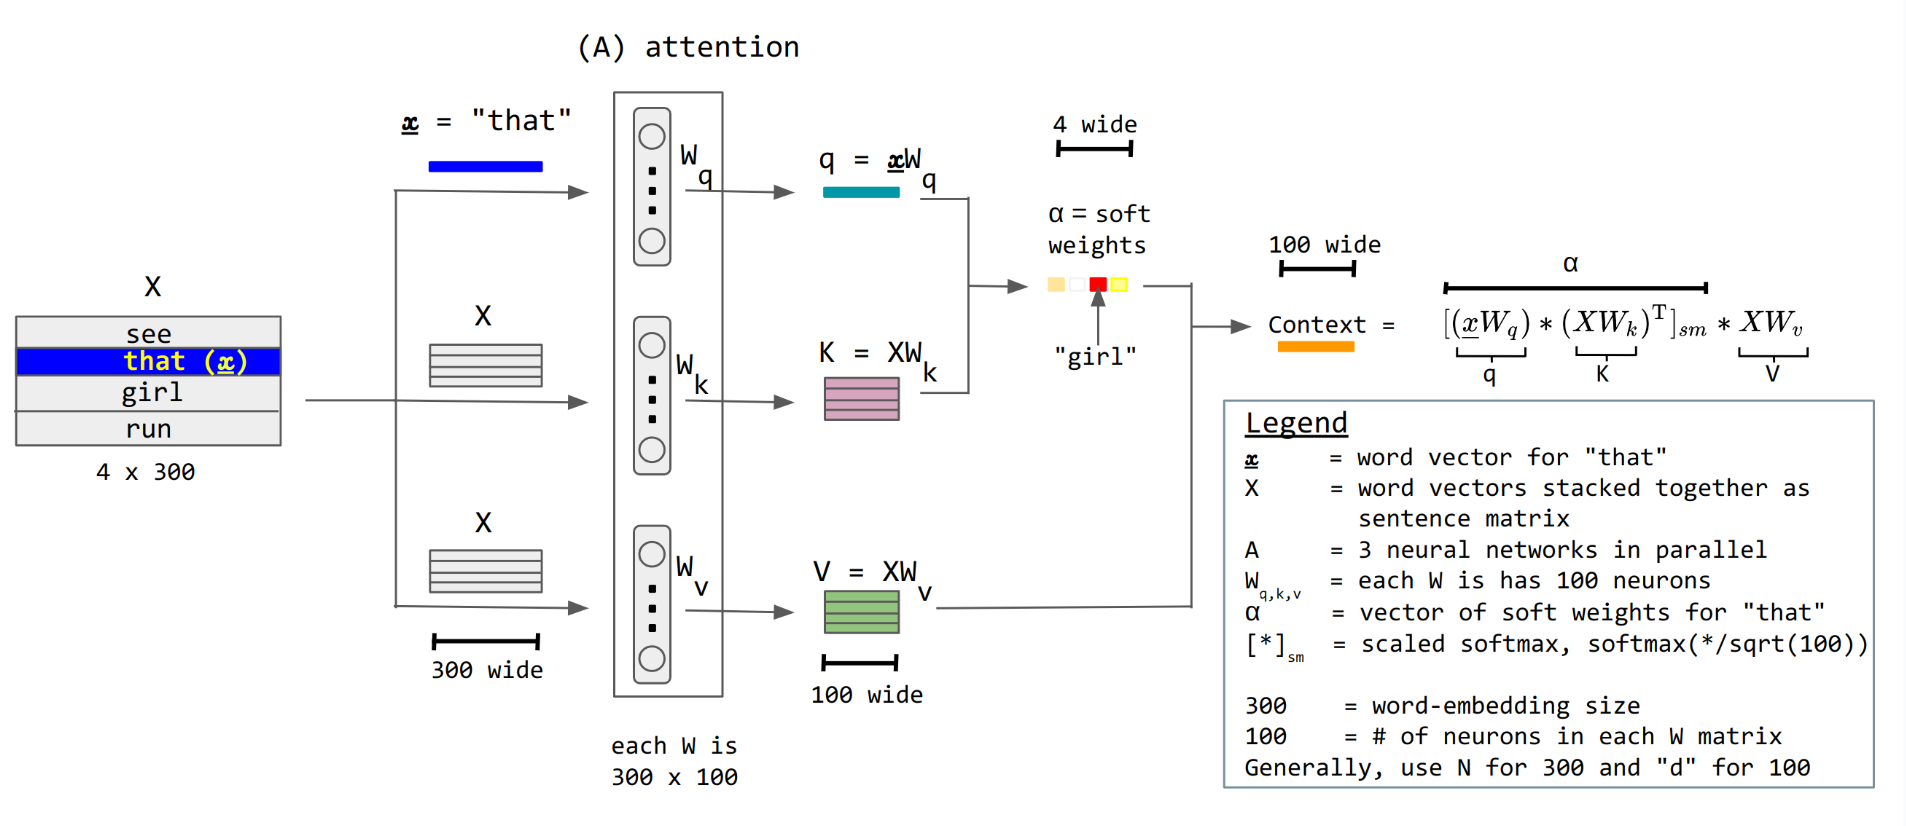

**4. 残差连接与层归一化：稳定训练，保留原始信息**

在 Transformer 的 Encoder（或 Decoder）中，**残差连接（Residual Connection） 和层归一化（Layer Normalization）** 是两大核心 “训练保障机制”—— 它们共同解决了深层模型训练中的**梯度消失**、**信息退化**问题，确保模型能**稳定学习并保留关键原始信息**。下面从 “目的” 和 “手段” 两方面详细拆解，结合具体流程和例子让逻辑更清晰。

**先明确核心背景：为什么需要这两个机制？**

Transformer 是**深层模型**（比如BERT-base 有12层 Encoder， GPT-3有上千层），而深层模型训练会遇到两个致命问题：

- **梯度消失/爆炸**： 反向传播时，梯度经过多层网络后会像“多米诺骨牌”一样逐渐变小（消失）或变大（爆炸），导致距离远的参数几乎无法更新，模型学不到东西。

- **信息退化**： 每一层网络都会对输入信息进行“加工”（比如注意力计算、线性变换），但多次加工后，原始输入的关键信息（如Token的基本语义）可能被稀释或扭曲，导致模型输出偏离核心逻辑。

残差连接和层归一化就是为了解决这两个问题而生的 ———— 前者负责 “保留原始信息 + 环节梯度消失”， 后者负责 “稳定训练分布 + 加速收敛”。

**残差连接(Residual Connection)：让信息“走捷径”，不丢失原始特征**

**a. 核心目的：保留原始信息，环节梯度消失**

残差连接的本质是给信息传递“开一条捷径” ———— 让每一层的**原始输入**不经过复杂计算，直接跳过当前层的加工模块，和加工后的输出合并。

这样做有两个关键作用：

- **避免信息退化**：即时即时当前层的加工过程对信息有损耗，原始输入的关键特征（如“猫”这个Token的基础语义）也能通过捷径传递到下一层，不被“加工稀释”。

- **缓解梯度消失**：反向传播时，梯度可以通过残差连接的“捷径”直接传递到远层（无需经过每一层间接传递），避免梯度在多层传递中逐渐变小直至消失。

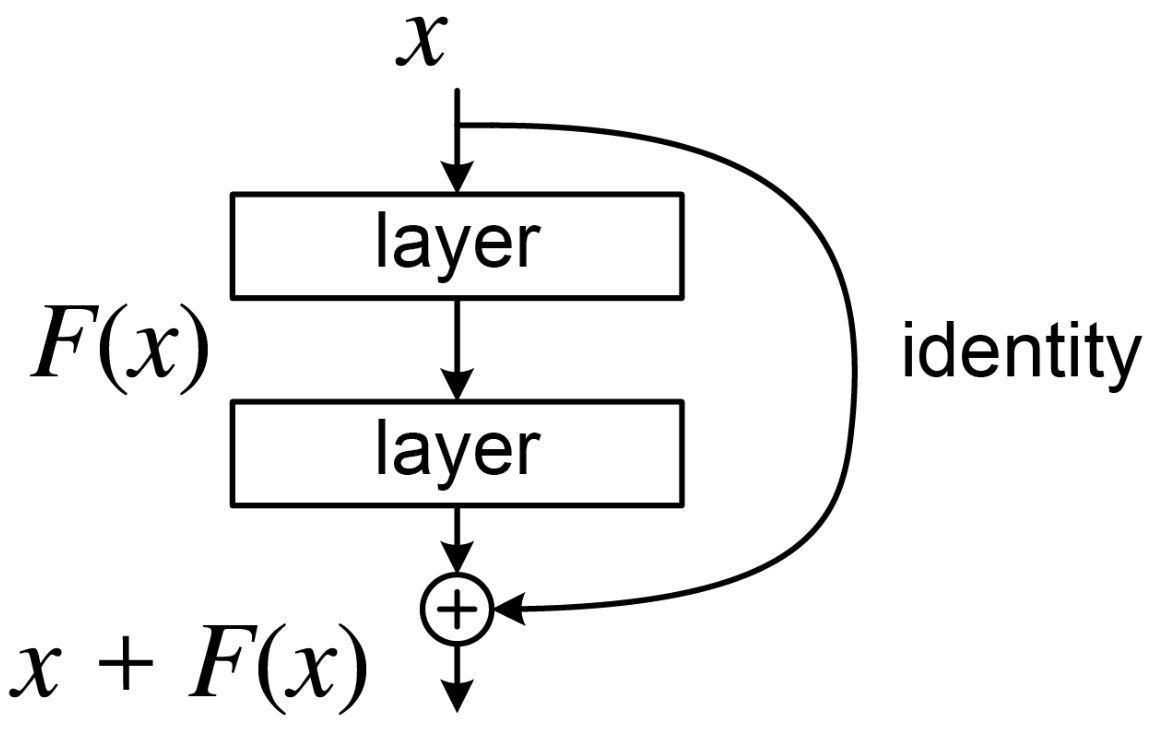

**b. 具体手段：“输入+加工输入”的元素 - wise 相加**

残差连接的操作非常直观，核心是**“原始输入”与“当前层加工后的输出”进行 - wise（逐元素）相加**，公式：

$$
Residual Output = Input + F(Input)
$$


**关键前提**：`Input`和`F(Input)`的形状必须完全一致（否则无法逐元素相加）。

**c. 例子：Encoder某一层的残差连接流程**

假设Encoder某一层的输入 `Input` 是一个形状为 `[2,5,64]`的张量（Batch=2个样本，Seq_Len=5个Token，每个Token的向量维度Dim=64））：

- 第一步：`Input`进入“多注意力层”，经过注意力计算后得到注意力输出（形状`[2, 5, 64]`）

- 第二步：注意力输出进入 “前馈神经网络（FFN）”，经过线性变换和激活函数后得到加工输出 `F(Input)`（形状仍为 `[2,5,64]`，因为 FFN 的输出维度与输入一致）

- 第三步：执行残差连接：将原始 `Input`（`[2,5,64]`）与 `F(Input)`（`[2,5,64]`）逐元素相加，得到 Residual Output（比如 Input 中某个位置的元素是 `3.2`，`F (Input)` 对应位置是 `1.8`，相加后就是 `5.0`）

- 第四步：`Residual Output` 再进入层归一化，最终作为下一层的输入

**层归一化（Layer Normalization，LN）：让训练“更稳定”，加速收敛**

**a. 核心目的：稳定特征分布，解决“内部协变量偏移”**

在深层模型训练中，每一层的输入特征分布会随着前一层参数的更新而不断变化（这种现象称为“**内部协变量偏移**，**Internal Covariate Shift**”）。比如：

- 第一层的输出分布是 `[均值=0, 方差=1]`

- 当第一层参数更新后，其输出分布可能变成`[均值=2, 方差=5]`

- 第二层需要重新适应这个新分布，导致学习效率下降，甚至训练不稳定。

层归一化的核心目的就是 **强制将每一层的输入特征分布拉回到均值接近0、方差接近1的标准正态分布**，从而：

- 解决内部协变量偏移，让每一层的输入分布更稳定，模型不用频繁适应新分布。

- 加速训练收敛：稳定的分布能让梯度更新更平滑，避免因分布波动导致的梯度震荡

- 提升模型鲁棒性：减少异常值对训练的影响（归一化会压缩极端异常值的范围）

**b. 具体手段：对“单个样本的所有Token特征”做归一化**

归一化的核心是：“消除特征差异”，但层归一化（LN）与传统的批量归一化（BN）不同 ———— BN 是对“同一批次所有样本的同一特征”归一化，而LN是对“单个样本的所有Token的特征”归一化，具体步骤分为：

- **step1：计算均值（Mean）和方差（Variance）**

    对于输入张量 `X`（形状`[Batch, Seq_Len, Dim]`，即“批次大小 × 序列长度 × 特征维度”），LN会针对每个样本、每个Token的所有特征维度计算均值和方差：

    - 假设摸一个样本的某个Token的特征向量是 $x=[x_1, x_2, \cdots, x_d]$（d是特征维度，如64）
 
    - 均值：$\mu=(x_1+x_2+\cdots+x_d) / d$ (所有特征的平均值)
 
    - 方差：$\sigma^2=[(x_1-\mu)^2 + (x_2-\mu)^2 + \cdots + (x_d-\mu)^2] / d$ (所有特征的方差，衡量特征值的离散程度)

- **step2：标准化（Normalization）**

    将计算出的均值和方差，将原始特征向量 $x$ 转换为 “均值=0、方差=1”的标准向量 $x'$

    $$
    x' = \frac{x-\mu}{\sqrt{\sigma^2+\varepsilon}}
    $$

    > 其中$\varepsilon$是一个极小值（如$1e-5$），目的是避免分母为0

- **step3：缩放与偏移（Scale & Shift）**

    标准化后的向量 $x'$ 虽然分布稳定，但可能丢失了原始数据的一些重要特性（比如某些特征本应具有更大的权重）。因此`LN`会引入两个可学习的参数：

    - 缩放参数 $\gamma$（与特征维度d相同，如`[64]`）：对标准化后的特征进行“放大/缩小”

    - 偏移参数 $\beta$(与特征维度d相同，如`[64]`)：对标准化后的特征进行“平移”

    最终的LN输出为：

    $$
    y = \gamma * x' + \beta
    $$

    这两个参数会在训练过程中不断更新，让模型自主学习“如何调整标准化后的特征”，既保留分布稳定，又不丢失关键信息。

**c. 例子：某Token的层归一化计算**

假设某样本的某 Token 特征向量为 x = `[4, 6, 8, 10]`（d=4，简化维度方便计算）：

- 计算均值：`μ = (4+6+8+10)/4 = 7`；

- 计算方差：`σ² = [(4-7)² + (6-7)² + (8-7)² + (10-7)²]/4 = (9+1+1+9)/4 = 5`；

- 标准化：`x' = (x - 7)/√(5+1e-5) ≈ [(-3)/2.236, (-1)/2.236, 1/2.236, 3/2.236] ≈ [-1.34, -0.45, 0.45, 1.34]`；

- 缩放与偏移：假设初始 `γ = [1,1,1,1]`，`β = [0,0,0,0]`，则 `y = x' ≈ [-1.34, -0.45, 0.45, 1.34]`（训练中 γ 和 β 会更新，比如 γ 可能调整为 `[1.2, 0.9, 1.1, 0.8]`，让重要特征权重更大）。



**Transformer中经典流程：残差连接与层归一化的协同工作**

在 Transformer 的 Encoder（或 Decoder）中，残差连接和层归一化不是孤立的，而是紧密配合、交替执行，经典流程被称为 “Pre-LN”（层归一化在残差连接之前），具体步骤如下（以 Encoder 某一层为例）：

- **输入层归一化**：将上一层的输出（作为当前层的`Input`）先经过层归一化（LN），得到稳定分布的特征`LN(Input)`

- **多头注意力计算**：`LN(Input)`进入多头注意力层，计算得到注意力输出 `Attn_Output`

- **第一次残差连接**：将原始 `Input` 与 `Attn_Output` 相加（`Input + Attn_Output`），得到残差输出 `Res1`；

- **第二次层归一化**：对 `Res1` 进行层归一化，得到 `LN(Res1)`；

- **前馈神经网络计算**：`LN(Res1)` 进入前馈神经网络（FFN），得到 `FFN_Output`；

- **第二次残差连接**：将 `Res1` 与 `FFN_Output` 相加（`Res1 + FFN_Output`），得到当前层的最终输出，传递给下一层。




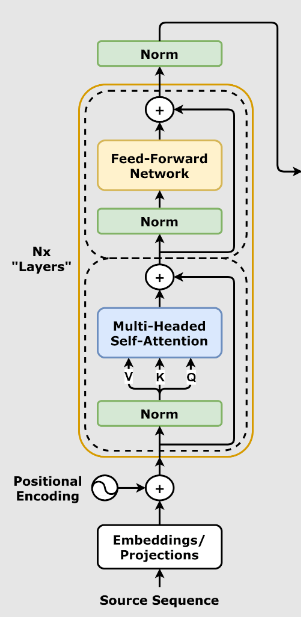

### 2.1.2 Decoder 结构

**Transformer 的架构分为两类，Decoder的作用随架构变化**

- **纯 Decoder 架构**

- **Encoder-Decoder 架构**

|架构类型|	核心组成|	适用任务范围|	Decoder 的核心角色|
|--|--|--|--|
|纯 Decoder 架构|	仅由多个 Decoder 层堆叠|	文本生成（续写、对话、创作）|	基于 “自身历史输出” 逐词预测，独立完成语义连贯的生成|
|Encoder-Decoder 架构|	Encoder 层 + Decoder 层|	翻译、摘要、图文生成|	结合 “Encoder 的语义理解”+“自身历史输出”，完成跨模态 / 跨语言的转化|

**1. 翻译任务：Decoder 是 “跨语言转写器”**

`Decoder` 的任务：**将Encoder理解的“源语言语义”，转化为“目标语言的连冠文本”**。

具体流程：

- `Encoder` 先处理源语言（如`I eat apples`），输出语义矩阵 `[3, 256]`

- `Decoder` 的输入分为两部分： 1 Encoder 的语义矩阵； 2 已生成的目标语言 `token` （如先生成“我”，再生产“我吃”）

- `Decoder` 通过“掩码注意力”（防止偷看后面的词）逐词生成目标语言（如“我吃苹果”）

**2. 文本生成任务（纯Decoder架构）：Decoder是“语意连贯生成器”**


